In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train = pd.read_csv('Assets/train_X.csv')
y_train = pd.read_csv('Assets/train_label.csv')

x_test = pd.read_csv('Assets/test_X.csv')
y_test = pd.read_csv('Assets/test_label.csv')


In [3]:
print(f'Shape of X-train : {x_train.shape}\nShape of Y_train : {y_train.shape}\nShape of X_test : {x_test.shape}\nShape of Y_test : {y_test.shape}')

Shape of X-train : (999, 784)
Shape of Y_train : (999, 10)
Shape of X_test : (349, 784)
Shape of Y_test : (349, 10)


784 = 28px x 28px (image input)

In [5]:
x_train = np.array(x_train).T
y_train = np.array(y_train).T
x_test = np.array(x_test).T
y_test = np.array(y_test).T

In [6]:
print(f'Shape of X-train : {x_train.shape}\nShape of Y_train : {y_train.shape}\nShape of X_test : {x_test.shape}\nShape of Y_test : {y_test.shape}')


Shape of X-train : (784, 999)
Shape of Y_train : (10, 999)
Shape of X_test : (784, 349)
Shape of Y_test : (10, 349)


# Now displaying our input image randomly

In [10]:
import random
import matplotlib.pyplot as plt

In [9]:
x_train.shape[1]

999

#### Now we are gonna take a random image and display it 
> - TODO
- Select a random image from the sample : `x_train.shape[1]`
- Select the sample and reshape it
- Additionally you can use the `cmap` to change its color

<function matplotlib.pyplot.show(close=None, block=None)>

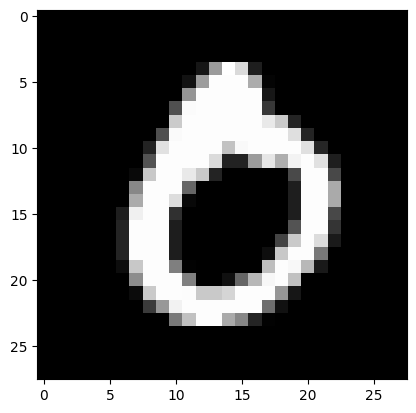

In [13]:
index = random.randrange(0, x_train.shape[1])
plt.imshow(x_train[:, index].reshape(28,28), cmap = 'gray')
plt.show

# Neural network
> Activation functions

In [34]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX / np.sum(expX, axis=0)


In [15]:
def der_tanh(x):
    return (1 - np.power(tanh(x), 2))

def der_relu(x):
    return np.array(x > 0 , dtype = np.float32)

### Initialise weights and biases

In [17]:
np.random.randn(4,2)

array([[ 0.6304768 ,  0.69287199],
       [-1.58966675,  1.85443931],
       [-1.55428661, -0.5390399 ],
       [-0.0812357 , -0.84826269]])

In [21]:
def initialise_parameters(nx, nh, ny):
    w1 = np.random.randn(nh, nx) * 0.01
    b1 = np.zeros((nh, 1))

    w2 = np.random.randn(ny, nh) * 0.01
    b2 = np.zeros((ny, 1))

    parameters = {
        'w1' : w1,
        'b1' : b1,
        'w2' : w2,
        'b2' : b2
    }

    return parameters

In [22]:
initialise_parameters(3, 4, 4)

{'w1': array([[ 0.00554042, -0.01088793, -0.01068916],
        [ 0.00098722, -0.004108  ,  0.00092707],
        [-0.01219032, -0.0060301 ,  0.00628014],
        [ 0.01194502,  0.00526338, -0.00388159]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'w2': array([[-0.00419717,  0.00052739,  0.01378646,  0.01241304],
        [-0.00910132,  0.00117729,  0.01408348, -0.01022559],
        [-0.00647968, -0.00486797, -0.00529317,  0.02759965],
        [ 0.0074645 ,  0.0084642 ,  0.00086031,  0.01190187]]),
 'b2': array([[0.],
        [0.],
        [0.],
        [0.]])}

### Forward Propagation


In [27]:
np.dot([[2,2],[4,3],[2,3]],[[2,3,3],[2,4,5]])

array([[ 8, 14, 16],
       [14, 24, 27],
       [10, 18, 21]])

In [71]:
def forward_prop(x, parameters):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    z1 = np.dot(w1, x) + b1
    a1 = tanh(z1)

    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)

    forward_cache = {
        'z1' : z1,
        'a1' : a1,
        'z2' : z2,
        'a2' : a2
    }

    return forward_cache

### Cost function


In [28]:
def cost_function(a2, y):
    m = y.shape[1]
    # Cross entropy
    cost = -(1/m) * np.sum(y * np.log(a2))
    return cost

### Backward propagation

In [72]:
def backward_prop(x, y, parameters, forward_cache):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    a1 = forward_cache['a1']
    a2 = forward_cache['a2']

    m = x.shape[1]

    dz2 = (a2 - y)
    dw2 = (1/m) * np.dot(dz2, a1.T)
    db2 = (1/m) * np.sum(dz2, axis = 1, keepdims = True)

    dz1 = (1/m) * np.dot(w2.T , dz2) * der_tanh(a1)
    dw1 = (1/m) * np.dot(dz1, x.T)
    db1 = (1/m) * np.sum(dz1, axis = 1, keepdims = True)

    gradients = {
        'dw1' : dw1,
        'db1' : db1,
        'dw2' : dw2,
        'db2' : db2
    }

    return gradients

### Update parameters


In [30]:
def update_params(parameters,gradients, learning_rate):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']

    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    
    parameters = {
        'w1' : w1,
        'b1' : b1,
        'w2' : w2,
        'b2' : b2
    }
    return parameters


# Final model

In [59]:
def model(x, y, nh, learning_rate, epochs):
    nx = x.shape[0]
    ny = y.shape[0]
    cost_lst = []
    parameters = initialise_parameters(nx, nh, ny)

    for epoch in range(epochs):
        forward_cache = forward_prop(x ,parameters)
        cost = cost_function(forward_cache['a2'], y)
        gradients = backward_prop(x, y, parameters, forward_cache)
        parameters = update_params(parameters, gradients, learning_rate)

        cost_lst.append(cost)

    return parameters, cost_lst

In [77]:
epochs = 1000
learning_rate = 0.01
nh = 999
parameters, cost_lst = model(x_train, y_train, nh, learning_rate, epochs)

# End

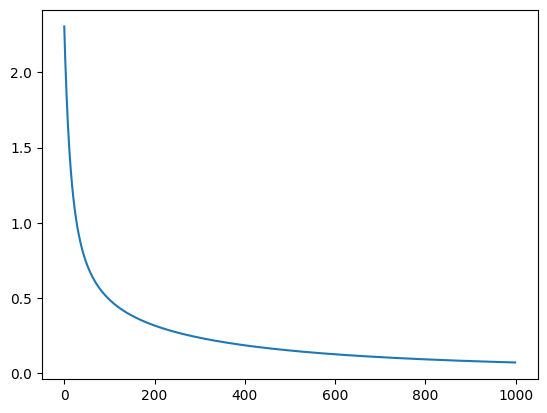

In [78]:
t = np.arange(0, epochs)
plt.plot(t, cost_lst)
plt.show()


In [79]:
def accuracy(x, y, parameters):

    forward_cache = forward_prop(x, parameters)

    a_out = forward_cache['a2']

    a_out = np.argmax(a_out, 0)

    y_out = np.argmax(y, 0)

    acc = np.mean(a_out == y_out) * 100

    return acc


In [80]:
print(accuracy(x_test, y_test, parameters))

86.53295128939828


<function matplotlib.pyplot.show(close=None, block=None)>

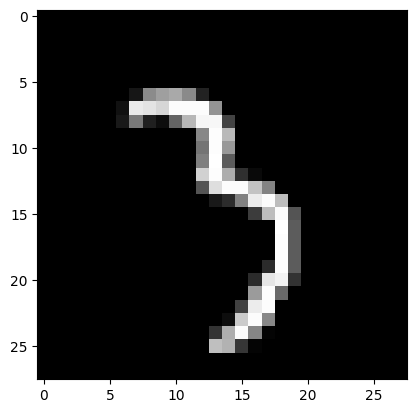

In [81]:
index = random.randrange(0, x_train.shape[1])
plt.imshow(x_train[:, index].reshape(28,28), cmap = 'gray')
plt.show

In [ ]:
def acc(x, parameters):

    forward_cache = forward_prop(x, parameters)

    a_out = forward_cache['a2']

    a_out = np.argmax(a_out, 0)

    return a_out